In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [114]:
uber = pd.read_csv("uber_drive_2016.csv")

In [115]:
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [116]:
uber.rename({'START_DATE*':'start_date','END_DATE*':'end_date','CATEGORY*':'category',
            'START*':'start','STOP*':'stop','MILES*':'miles','PURPOSE*':'purpose'}, axis=1,inplace=True)

In [117]:
uber.head()

,start_date,end_date,category,start,stop,miles,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [122]:
uber.drop(uber[uber['start_date'] == 'Totals'].index,inplace=True)

In [124]:
uber['START_DATE'] = uber['start_date'].str.split(' ').str.get(0)
uber['END_DATE'] = uber['end_date'].str.split(' ').str.get(0)

In [126]:
uber['START_DATE_AND_TIME'] = pd.to_datetime(uber['start_date'])

In [127]:
uber['END_DATE_AND_TIME'] = pd.to_datetime(uber['end_date'])
uber.tail()

,start_date,end_date,category,start,stop,miles,purpose,START_DATE,END_DATE,START_DATE_AND_TIME,END_DATE_AND_TIME
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting,12/31/2016,12/31/2016,2016-12-31 01:07:00,2016-12-31 01:14:00
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,12/31/2016,12/31/2016,2016-12-31 13:24:00,2016-12-31 13:42:00
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,12/31/2016,12/31/2016,2016-12-31 15:03:00,2016-12-31 15:38:00
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,12/31/2016,12/31/2016,2016-12-31 21:32:00,2016-12-31 21:50:00
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site,12/31/2016,12/31/2016,2016-12-31 22:08:00,2016-12-31 23:51:00


In [128]:
uber.drop(['start_date','end_date'], axis=1, inplace=True)

In [129]:
uber.head()

,category,start,stop,miles,purpose,START_DATE,END_DATE,START_DATE_AND_TIME,END_DATE_AND_TIME
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1/1/2016,1/1/2016,2016-01-01 21:11:00,2016-01-01 21:17:00
1,Business,Fort Pierce,Fort Pierce,5.0,NaN,1/2/2016,1/2/2016,2016-01-02 01:25:00,2016-01-02 01:37:00
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1/2/2016,1/2/2016,2016-01-02 20:25:00,2016-01-02 20:38:00
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1/5/2016,1/5/2016,2016-01-05 17:31:00,2016-01-05 17:45:00
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1/6/2016,1/6/2016,2016-01-06 14:42:00,2016-01-06 15:49:00


In [130]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   category             1155 non-null   object        
 1   start                1155 non-null   object        
 2   stop                 1155 non-null   object        
 3   miles                1155 non-null   float64       
 4   purpose              653 non-null    object        
 5   START_DATE           1155 non-null   object        
 6   END_DATE             1155 non-null   object        
 7   START_DATE_AND_TIME  1155 non-null   datetime64[ns]
 8   END_DATE_AND_TIME    1155 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 90.2+ KB


In [131]:
uber['START_DATE'] =  pd.to_datetime(uber['START_DATE'], format='%m/%d/%Y')

In [132]:
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'], format='%m/%d/%Y')

In [133]:
uber.head()

,category,start,stop,miles,purpose,START_DATE,END_DATE,START_DATE_AND_TIME,END_DATE_AND_TIME
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,2016-01-01,2016-01-01 21:11:00,2016-01-01 21:17:00
1,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,2016-01-02,2016-01-02 01:25:00,2016-01-02 01:37:00
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,2016-01-02,2016-01-02 20:25:00,2016-01-02 20:38:00
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,2016-01-05,2016-01-05 17:31:00,2016-01-05 17:45:00
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,2016-01-06,2016-01-06 14:42:00,2016-01-06 15:49:00


In [134]:
uber['duration'] = uber['END_DATE_AND_TIME'] - uber['START_DATE_AND_TIME']
uber.head()

,category,start,stop,miles,purpose,START_DATE,END_DATE,START_DATE_AND_TIME,END_DATE_AND_TIME,duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,2016-01-01,2016-01-01 21:11:00,2016-01-01 21:17:00,0 days 00:06:00
1,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,2016-01-02,2016-01-02 01:25:00,2016-01-02 01:37:00,0 days 00:12:00
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,2016-01-02,2016-01-02 20:25:00,2016-01-02 20:38:00,0 days 00:13:00
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,2016-01-05,2016-01-05 17:31:00,2016-01-05 17:45:00,0 days 00:14:00
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,2016-01-06,2016-01-06 14:42:00,2016-01-06 15:49:00,0 days 01:07:00


In [135]:
uber['duration'] = uber['duration'].dt.total_seconds()/60

In [136]:
uber['START_DAY'] = uber['START_DATE'].dt.day_name()

In [137]:
uber['END_DAY'] = uber['END_DATE'].dt.day_name()

In [138]:
uber['MONTH'] = uber['START_DATE'].dt.strftime('%B')

In [139]:
uber.head()

,category,start,stop,miles,purpose,START_DATE,END_DATE,START_DATE_AND_TIME,END_DATE_AND_TIME,duration,START_DAY,END_DAY,MONTH
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,2016-01-01,2016-01-01 21:11:00,2016-01-01 21:17:00,6.0,Friday,Friday,January
1,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02,2016-01-02,2016-01-02 01:25:00,2016-01-02 01:37:00,12.0,Saturday,Saturday,January
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,2016-01-02,2016-01-02 20:25:00,2016-01-02 20:38:00,13.0,Saturday,Saturday,January
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,2016-01-05,2016-01-05 17:31:00,2016-01-05 17:45:00,14.0,Tuesday,Tuesday,January
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,2016-01-06,2016-01-06 14:42:00,2016-01-06 15:49:00,67.0,Wednesday,Wednesday,January


In [140]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   category             1155 non-null   object        
 1   start                1155 non-null   object        
 2   stop                 1155 non-null   object        
 3   miles                1155 non-null   float64       
 4   purpose              653 non-null    object        
 5   START_DATE           1155 non-null   datetime64[ns]
 6   END_DATE             1155 non-null   datetime64[ns]
 7   START_DATE_AND_TIME  1155 non-null   datetime64[ns]
 8   END_DATE_AND_TIME    1155 non-null   datetime64[ns]
 9   duration             1155 non-null   float64       
 10  START_DAY            1155 non-null   object        
 11  END_DAY              1155 non-null   object        
 12  MONTH                1155 non-null   object        
dtypes: datetime64[ns](4), float64(2),

In [141]:
uber.pivot_table(index='purpose',values=['miles','duration']).sort_values(by='duration', ascending=False)

,duration,miles
purpose,,
Commute,185.000000,180.200000
Customer Visit,33.415842,20.688119
Meeting,29.737968,15.247594
Charity ($),27.000000,15.100000
Airport/Travel,26.000000,5.500000
Temporary Site,25.860000,10.474000
Between Offices,25.500000,10.944444
Meal/Entertain,16.125000,5.698125
Moving,15.000000,4.550000


In [142]:
uber.pivot_table(index='purpose',values=['miles','duration'],aggfunc=['count','median','std'])

count         median                std           
                duration miles duration   miles   duration      miles
Airport/Travel         3     3     29.0    4.80   9.848858   1.852026
Between Offices       18    18     23.0   11.60  15.553513   8.458913
Charity ($)            1     1     27.0   15.10        NaN        NaN
Commute                1     1    185.0  180.20        NaN        NaN
Customer Visit       101   101     21.0    7.90  42.891087  40.632891
Errand/Supplies      128   128     10.0    3.10   9.656677   3.464619
Meal/Entertain       160   160     13.5    4.25  10.477739   5.019690
Meeting              187   187     22.0   10.00  26.662381  25.093394
Moving                 4     4     14.0    4.40   4.546061   1.181807
Temporary Site        50    50     20.0    8.00  18.233195   7.757440

In [143]:
uber.pivot_table(index='MONTH', values=['miles','duration'],aggfunc=['count','median']).sort_values(by='MONTH')

count         median      
          duration miles duration miles
MONTH                                  
April           54    54     19.0  8.80
August         133   133     18.0  5.70
December       146   146     15.5  4.50
February       115   115     17.0  6.10
January         61    61     14.0  5.50
July           112   112     17.0  7.10
June           108   108     17.5  7.25
March          113   113     16.0  6.60
May             49    49     12.0  6.10
November       122   122     13.0  3.45
October        106   106     20.0  8.35
September       36    36     19.0  9.70

In [144]:
uber.pivot_table(index='START_DAY', values=['miles','duration'], aggfunc=['count','median','std'])

count         median              std           
          duration miles duration miles   duration      miles
START_DAY                                                    
Friday         206   206     18.0  7.50  33.563665  29.967174
Monday         174   174     15.0  5.30  13.740246   7.737014
Saturday       150   150     18.0  6.15  31.003731  25.462477
Sunday         148   148     15.0  6.10  25.486099  25.802601
Thursday       154   154     17.0  6.10  28.501737  21.816582
Tuesday        176   176     16.0  5.70  29.607431  15.988558
Wednesday      147   147     15.0  4.90  22.578427  13.358605

In [145]:
uber.pivot_table(index=['MONTH','START_DAY'],values=['miles','duration'])

duration      miles
MONTH     START_DAY                      
April     Friday     26.150000  12.175000
          Saturday   55.500000  43.808333
          Sunday     40.000000  42.125000
          Thursday   25.571429  13.128571
          Tuesday    19.125000   8.212500
...                        ...        ...
September Saturday   20.666667   4.466667
          Sunday      3.333333   9.266667
          Thursday   45.200000   7.860000
          Tuesday    80.625000  39.300000
          Wednesday  69.500000  10.600000

[83 rows x 2 columns]

In [148]:
uber.drop(uber[uber['purpose'] == 'Commute'].index,inplace=True)

In [152]:
uber['purpose'].value_counts(normalize=True)

Meeting            0.286810
Meal/Entertain     0.245399
Errand/Supplies    0.196319
Customer Visit     0.154908
Temporary Site     0.076687
Between Offices    0.027607
Moving             0.006135
Airport/Travel     0.004601
Charity ($)        0.001534
Name: purpose, dtype: float64

<AxesSubplot:xlabel='purpose', ylabel='miles'>

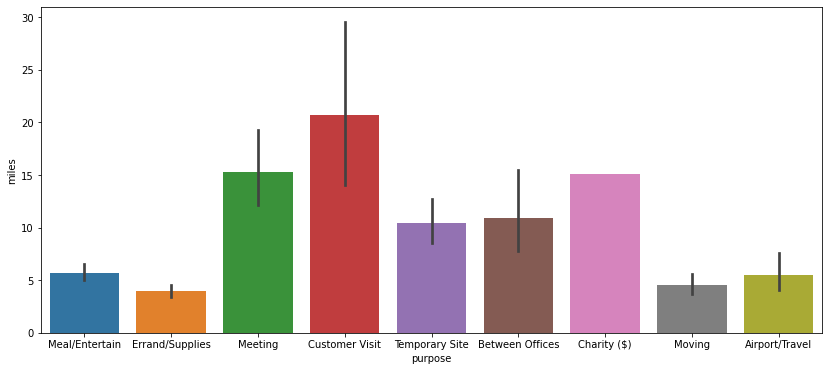

In [157]:
plt.figure(figsize=(14,6))
sns.barplot(x=uber['purpose'],y=uber['miles'])

<AxesSubplot:xlabel='purpose', ylabel='duration'>

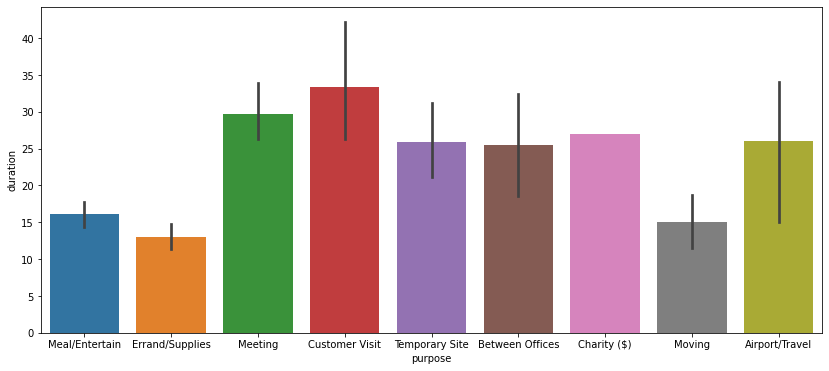

In [158]:
plt.figure(figsize=(14,6))
sns.barplot(x=uber['purpose'],y=uber['duration'])

<Figure size 864x576 with 0 Axes>

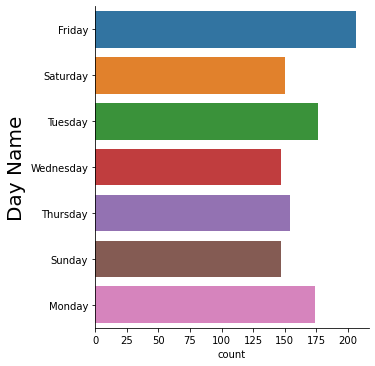

In [167]:
plt.figure(figsize=(12,8))
sns.catplot(y=uber['START_DAY'], data=uber, kind='count',legend=True)
plt.ylabel('Day Name', size=20)
plt.show()

<Figure size 864x720 with 0 Axes>

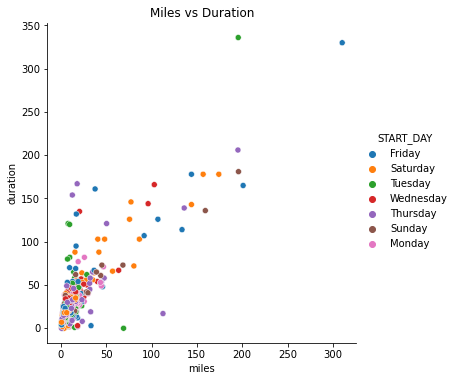

In [179]:
plt.figure(figsize=[12,10])
sns.relplot(x='miles', y='duration', data=uber, kind='scatter',hue=uber['START_DAY'])
plt.title('Miles vs Duration')
plt.show()

<AxesSubplot:xlabel='count', ylabel='purpose'>

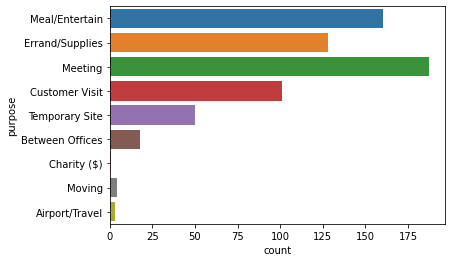

In [181]:
sns.countplot(y='purpose', data=uber)

<AxesSubplot:xlabel='count', ylabel='purpose'>

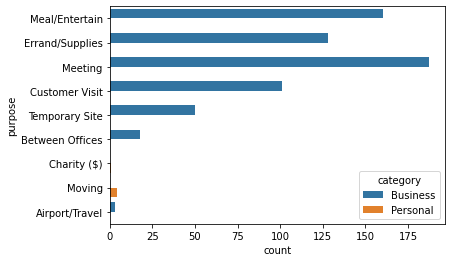

In [182]:
sns.countplot(y='purpose', hue='category', data=uber)

/Users/bt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


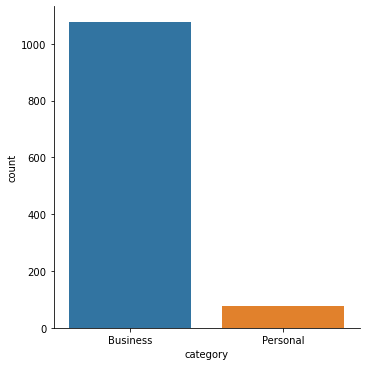

In [183]:
sns.catplot('category', data=uber, kind='count')

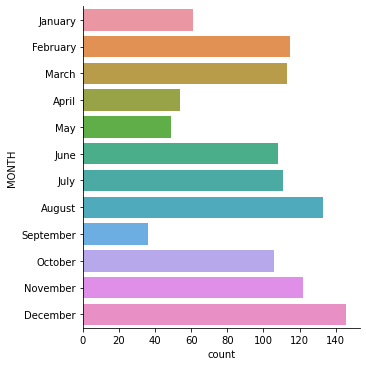

In [186]:
sns.catplot(y='MONTH', data=uber, kind='count')

<AxesSubplot:xlabel='duration', ylabel='MONTH'>

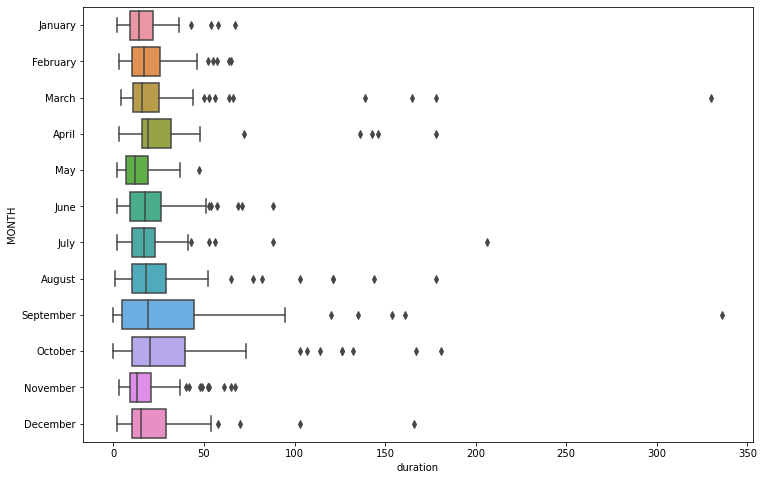

In [189]:
plt.figure(figsize=[12,8])
sns.boxplot(y='MONTH',x='duration', data=uber)

<AxesSubplot:xlabel='miles', ylabel='purpose'>

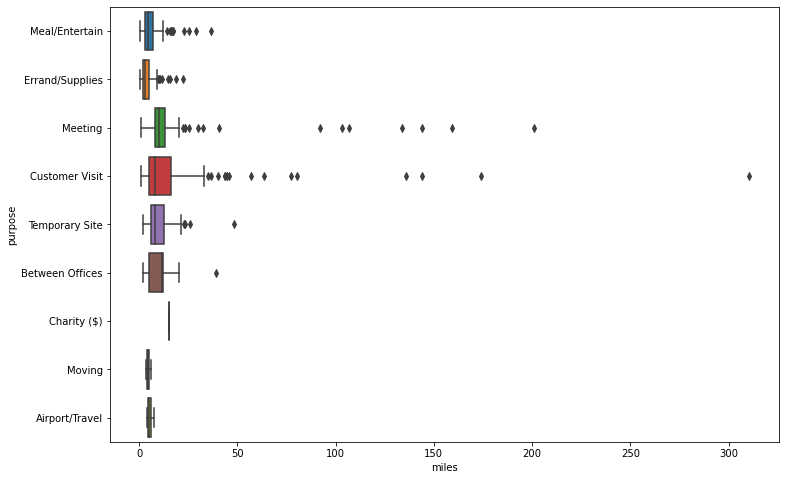

In [191]:
plt.figure(figsize=(12,8))
sns.boxplot(x='miles', y = 'purpose', data=uber)

<AxesSubplot:xlabel='duration', ylabel='category'>

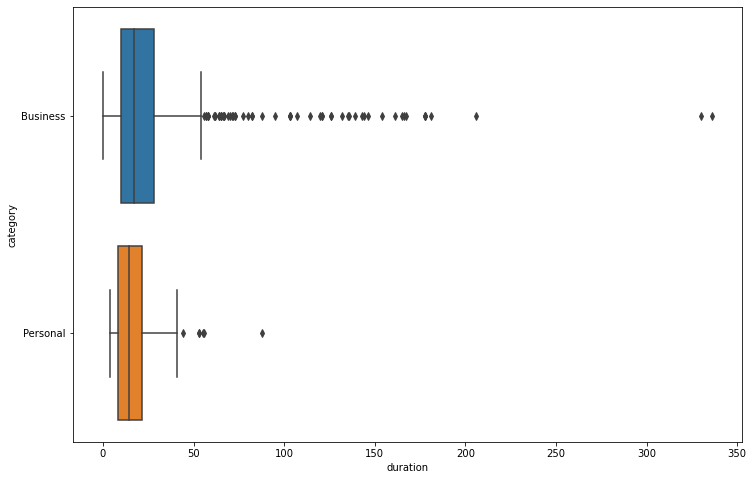

In [192]:
plt.figure(figsize=(12,8))
sns.boxplot(x='duration', y = 'category', data=uber)